<a href="https://colab.research.google.com/github/Lalithavanukuri/heartdisease_classification/blob/main/heartdiseaseclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [6]:
# Load the data file
data = pd.read_csv("/content/heart.csv")


# Display the first few rows of the dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Preprocessing steps
# Handle missing values
data.fillna(data.mean(), inplace=True)

In [8]:
# Split the dataset into features (X) and target variable (y)
X = data.drop("target", axis=1)
y = data["target"]


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
print(X_train)

[[-0.58584022  0.65465367  1.008275   ...  1.00526437  2.17169136
  -0.54519316]
 [ 1.05147737 -1.52752523 -0.91672034 ...  1.00526437 -0.7254674
  -0.54519316]
 [-0.04006769 -1.52752523  1.008275   ...  1.00526437 -0.7254674
  -0.54519316]
 ...
 [-0.36753121  0.65465367 -0.91672034 ...  1.00526437 -0.7254674
   1.11057867]
 [-1.24076726  0.65465367 -0.91672034 ...  1.00526437 -0.7254674
   1.11057867]
 [-0.2583767   0.65465367 -0.91672034 ...  1.00526437  0.24025219
  -0.54519316]]


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:

model = DecisionTreeClassifier(random_state=42)# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[102,   0],
       [  3, 100]])

In [1]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

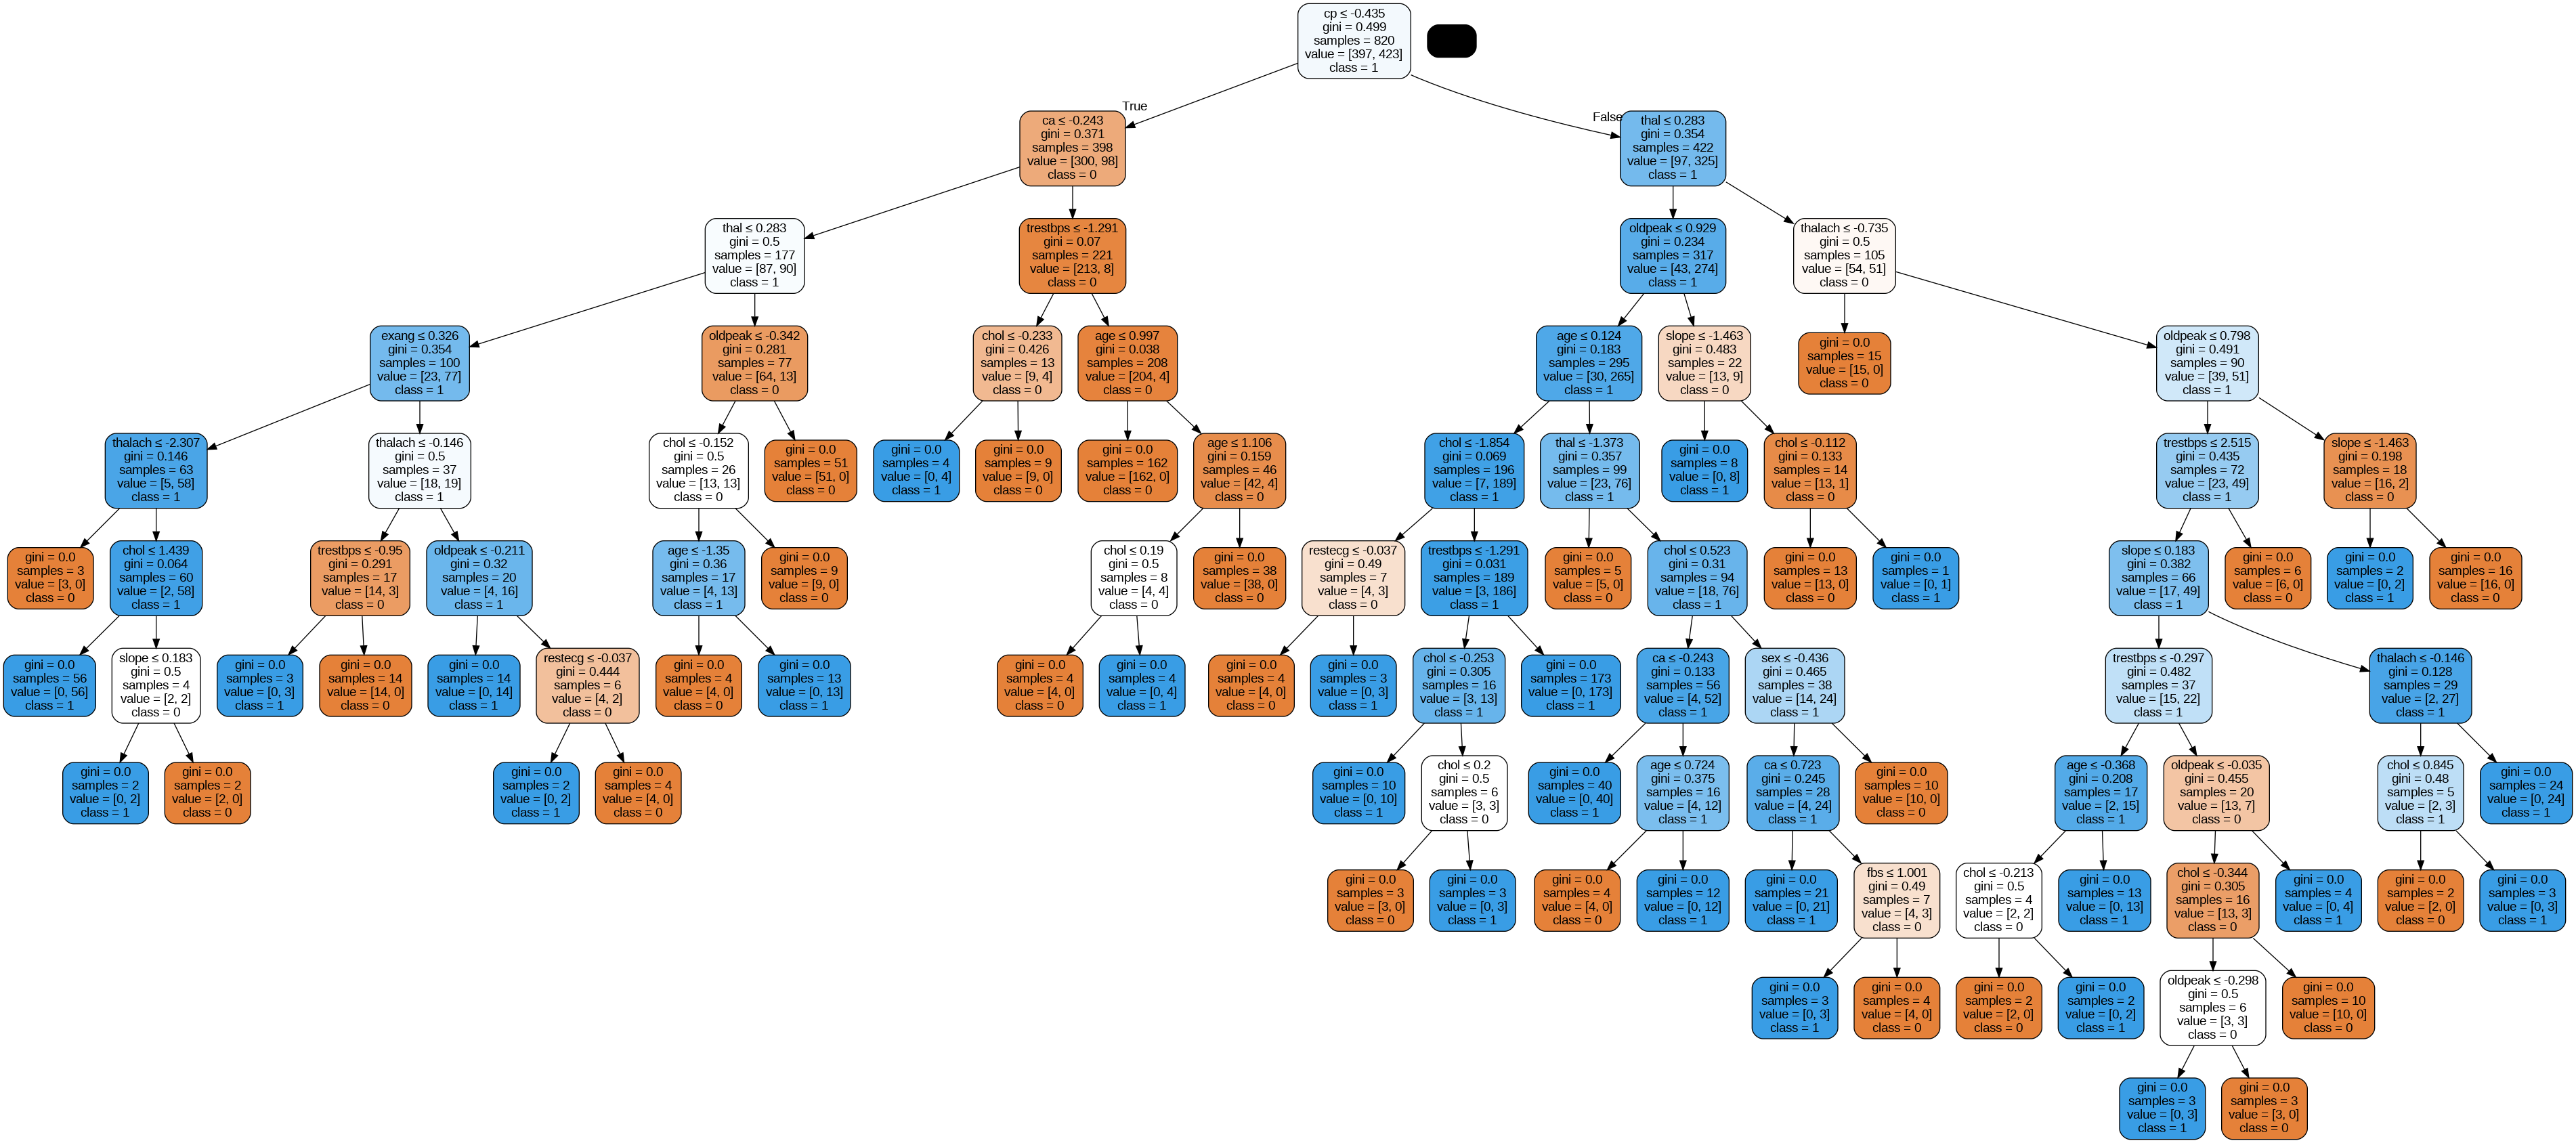

In [20]:
# Generate the decision tree visualization
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns,
                           class_names=["0", "1"], filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())